In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv('./dataset/movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# 통계량, null값 확인

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None
             time  dir_prev_bfnum  dir_prev_num   num_staff   num_actor  \
count  600.000000    2.700000e+02    600.000000  600.000000  600.000000   
mean   100.863333    1.050443e+06      0.876667

In [6]:
df.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

감독의 이전 영화 관객수를 파악하지 못한 dir_prev_bfnum 컬럼을 제외하면 null 값은 없음

# 배급사 (distibutor)

In [7]:
df['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [12]:
df['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [34]:
(df['distributor'].value_counts() >= 10).value_counts()

False    155
True      14
Name: distributor, dtype: int64

CJ 엔터테인먼트, 롯데엔터테인먼트, (주)NEW, (주)마운틴픽쳐스, (주)쇼박스 순으로 많음  
169개의 회사 중 주요 배급사들을 제외하면 영화 배급량이 현저히 적음  
10개 이상 배급한 배급사는 14개 회사

In [47]:
distributor_list = df['distributor'].value_counts().index.tolist()
distributor_list

['CJ 엔터테인먼트',
 '롯데엔터테인먼트',
 '(주)NEW',
 '(주)마운틴픽쳐스',
 '(주)쇼박스',
 '인디스토리',
 '골든타이드픽처스',
 '(주) 케이알씨지',
 '(주) 영화사조제',
 '영화사 진진',
 '시네마달',
 '어뮤즈',
 '(주)키노아이',
 '시너지',
 '인디플러그',
 'NEW',
 '인벤트 디',
 'KT&G 상상마당',
 '스폰지',
 '무비꼴라쥬',
 '(주)팝엔터테인먼트',
 '시네마서비스',
 '필라멘트 픽쳐스',
 '시네마 달',
 'BoXoo 엔터테인먼트',
 'CGV아트하우스',
 '리틀빅픽처스',
 '나이너스엔터테인먼트(주)',
 '마노엔터테인먼트',
 '메가박스(주)플러스엠',
 '(주)엣나인필름',
 '홀리가든',
 '씨너스엔터테인먼트(주)',
 '이십세기폭스코리아(주)',
 '싸이더스',
 '이모션 픽처스',
 'KT',
 '트리필름',
 '씨네그루(주)키다리이엔티',
 '타임스토리그룹',
 '(주)마인스 엔터테인먼트',
 '마운틴 픽처스',
 '(주) 브릿지웍스',
 'CJ E&M 영화부문',
 '김기덕 필름',
 '(주) 영화제작전원사',
 '드림팩트 엔터테인먼트',
 '서울독립영화제',
 '조이앤시네마',
 '드림로드',
 'CJ E&M Pictures',
 '(주)프레인글로벌',
 '(주)스톰픽쳐스코리아',
 '(주)마인스엔터테인먼트',
 '쇼박스(주)미디어플렉스',
 '화앤담이엔티',
 '(주) 액티버스엔터테인먼트',
 '백두대간',
 '에스피엠',
 '(주)리틀빅픽처스',
 '웃기씨네',
 'SBS콘텐츠허브',
 '리틀빅픽쳐스',
 '파이오니아21',
 '(주)시네마달',
 '노바엔터테인먼트',
 'CGV 아트하우스',
 '(주)패뷸러스',
 '상구네 필름',
 '프리비젼 엔터테인먼트',
 '전주국제영화제',
 '영화사 廊',
 '두 엔터테인먼트',
 '판씨네마(주)',
 '영화사 조아',
 '싸이더스 FNH',
 '에이원 엔터테인먼트',
 '(주)스마일이엔티',
 '케이엠스타',
 '(주

In [49]:
num_list = df['distributor'].value_counts().values.tolist()
num_list

[54,
 52,
 30,
 29,
 26,
 26,
 15,
 14,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [78]:
df['distribute_freq']
for distributor in distributor_list :
    df.loc[df['distributor'] == distributor, 'distribute_freq'] = num_list[distributor_list.index(distributor)]

In [79]:
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distribute_freq
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,52
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,26
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,26
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,30
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,30
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,26
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,29
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,54


{'whiskers': [<matplotlib.lines.Line2D at 0x199f8835fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x199f8846460>,
 'boxes': [<matplotlib.lines.Line2D at 0x199f8835cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x199f8846a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x199f8846cd0>],
 'means': []}

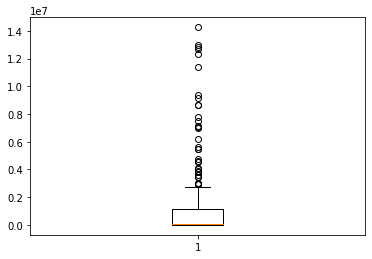

In [83]:
plt.boxplot(df[df['distribute_freq'] >= 10]['box_off_num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x199f88e6130>,
 'caps': [<matplotlib.lines.Line2D at 0x199f88e66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x199f88dae20>],
 'medians': [<matplotlib.lines.Line2D at 0x199f88e6c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x199f88e6f40>],
 'means': []}

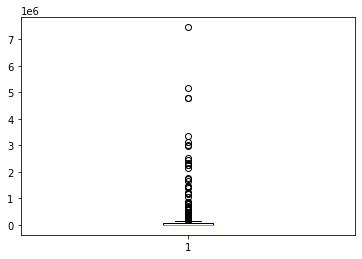

In [84]:
plt.boxplot(df[df['distribute_freq'] < 10]['box_off_num'])

In [85]:
df[df['distribute_freq'] >= 10]['box_off_num'].mean()

1113916.045751634

In [86]:
df[df['distribute_freq'] < 10]['box_off_num'].mean()

285886.8741496599